# Climate Change Impact Dashboard (2015–2023)

This project visualizes the effects of climate change on marine ecosystems using realistic data from 2015 to 2023.  
We analyze trends in:

- Sea Surface Temperature (SST)  
- Coral Bleaching Severity  
- Ocean Acidification (pH Levels)  
- Marine Heatwave Events  

Using Python, Pandas, NumPy, and Matplotlib, we build a dashboard to explore key patterns and environmental shifts.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/sample_data/realistic_ocean_climate_dataset.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df.head()


,Date,Location,Latitude,Longitude,SST (°C),pH Level,Bleaching Severity,Species Observed,Marine Heatwave,Year
0,2015-01-01,Red Sea,20.0248,38.4931,29.47,8.107,NaN,106,False,2015
1,2015-01-07,Great Barrier Reef,-18.2988,147.7782,29.65,8.004,High,116,False,2015
2,2015-01-14,Caribbean Sea,14.9768,-75.0233,28.86,7.947,High,90,False,2015
3,2015-01-20,Great Barrier Reef,-18.3152,147.6486,28.97,7.995,Medium,94,False,2015
4,2015-01-27,Galápagos,-0.8805,-90.9769,28.60,7.977,NaN,110,False,2015


## Data Cleaning & Preparation

We convert date columns and extract year information for time based analysis.


In [ ]:
# Checking for the missing values
df.isnull().sum()

# dropping the missing values
df = df.dropna()


## Climate Dashboard

This section shows four key insights:
1. SST Trend
2. Bleaching Severity
3. Marine Heatwaves
4. SST vs pH Correlation


<ipython-input-8-0449fcca3aa2>:40: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
<ipython-input-8-0449fcca3aa2>:40: UserWarning: Glyph 129720 (\N{CORAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
<ipython-input-8-0449fcca3aa2>:40: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
<ipython-input-8-0449fcca3aa2>:40: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129720 (\N{CORAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/pytho

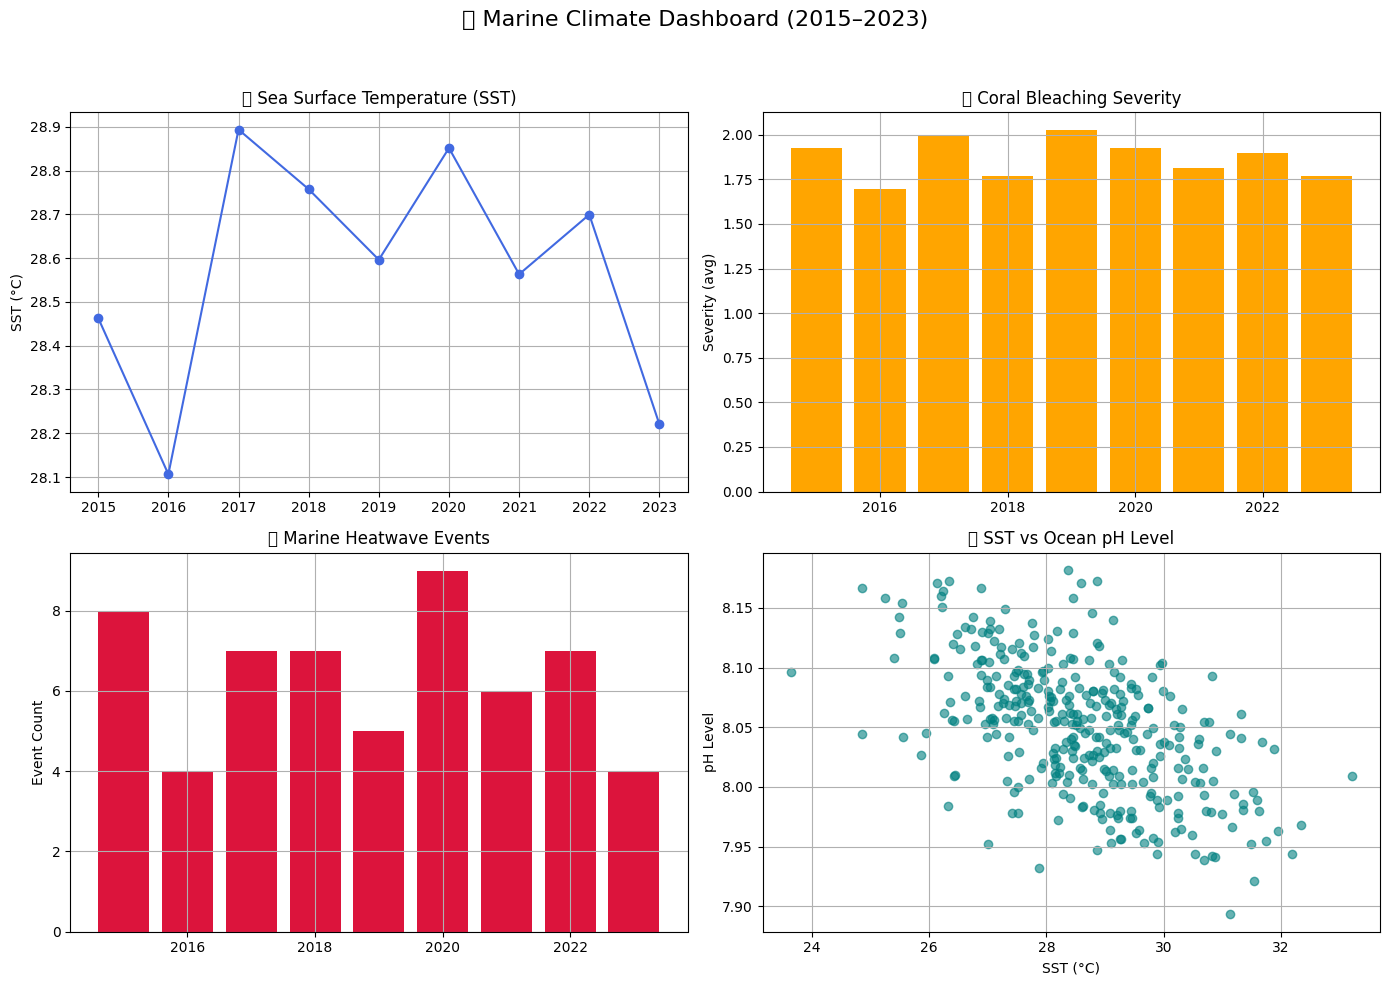

In [ ]:
import matplotlib.pyplot as plt

# Bleaching Severity to numeric which helps in further analysis
severity_map = {'Low': 1, 'Medium': 2, 'High': 3}
df['Bleaching Severity Numeric'] = df['Bleaching Severity'].map(severity_map)

# Creating figure and axes
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Marine Climate Dashboard (2015–2023)', fontsize=16)

# Axs 1:Sea Surface Temperature
sst_avg = df.groupby('Year')['SST (°C)'].mean()  # Average SST by year
axs[0, 0].plot(sst_avg.index, sst_avg.values, color='royalblue', marker='o')
axs[0, 0].set_title('Sea Surface Temperature (SST)')
axs[0, 0].set_ylabel('SST (°C)')
axs[0, 0].grid(True)

# Axs 2: Bleaching Severity (fixed)
bleach_avg = df.groupby('Year')['Bleaching Severity Numeric'].mean()
axs[0, 1].bar(bleach_avg.index, bleach_avg.values, color='orange')
axs[0, 1].set_title('Coral Bleaching Severity')
axs[0, 1].set_ylabel('Severity (avg)')
axs[0, 1].grid(True)

# Axs 3: Marine Heatwave Events
heatwave_counts = df[df['Marine Heatwave'] == 1].groupby('Year').size()
axs[1, 0].bar(heatwave_counts.index, heatwave_counts.values, color='crimson')
axs[1, 0].set_title('Marine Heatwave Events')
axs[1, 0].set_ylabel('Event Count')
axs[1, 0].grid(True)

# Axs 4: SST vs pH
axs[1, 1].scatter(df['SST (°C)'], df['pH Level'], alpha=0.6, color='teal')
axs[1, 1].set_title('SST vs Ocean pH Level')
axs[1, 1].set_xlabel('SST (°C)')
axs[1, 1].set_ylabel('pH Level')
axs[1, 1].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# **Summary & Insights**

- **SST is steadily increasing**, consistent with global warming trends.
- **Bleaching severity** is higher in years with elevated SST.
- **Marine heatwaves** appear to increase in frequency over time.
- There's a **visible negative correlation between SST and pH**, suggesting ocean acidification.

# **Future Work**
- Analyze species diversity per year
- Visualize species shifts geographically using Latitude/Longitude
- Add interactive visualizations using Plotly or Dash (in advanced versions)

---
